In [ ]:
!pip install easyocr
!pip install imutils
! git clone https://github.com/berito/license_plate_detection.git

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## load and display image

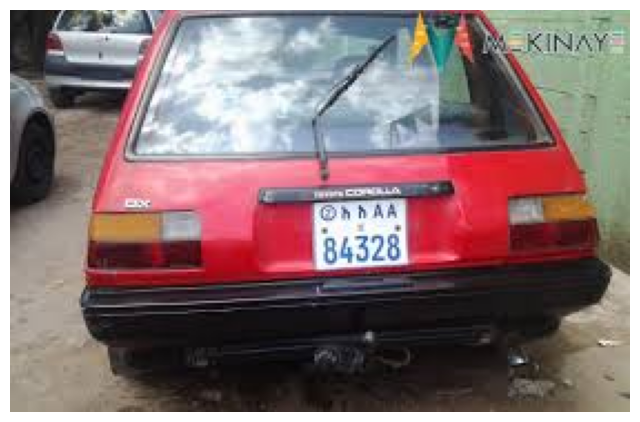

In [5]:

img = cv2.imread("/content/license_plate_detection/images/img1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

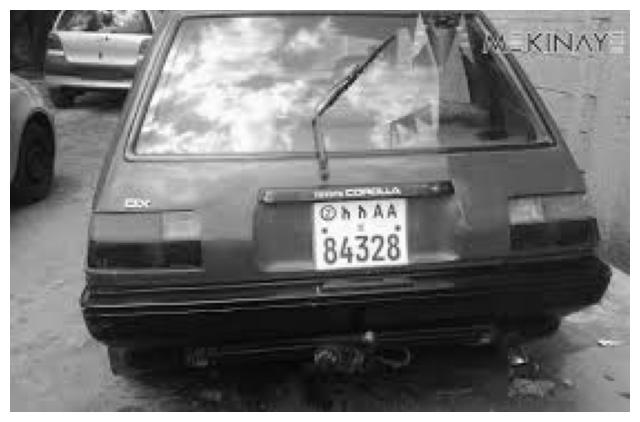

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## edge detection

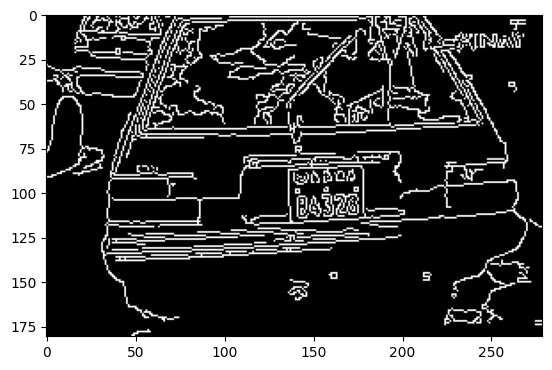

In [15]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

#### contour detection

In [17]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [18]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[178,  87]],

       [[178, 114]],

       [[137, 115]],

       [[137,  87]]], dtype=int32)

## mask contours with original image size

In [19]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

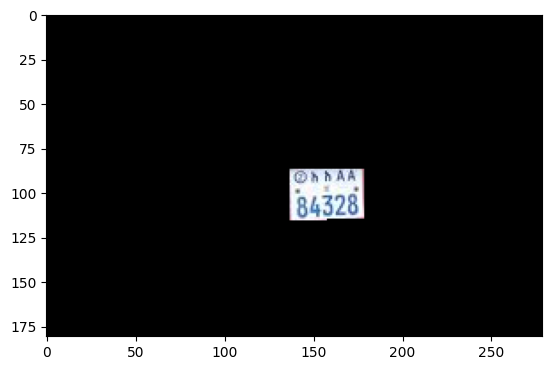

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## crop masked image

In [20]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

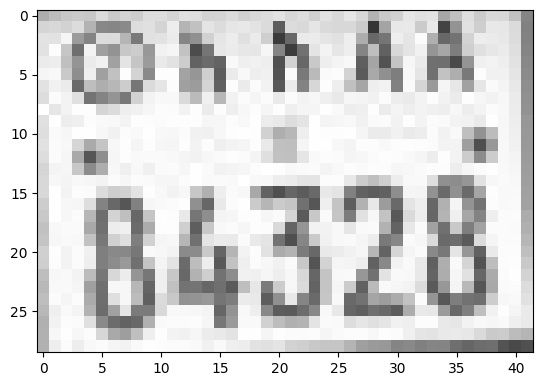

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## extract text from image using OCR(easyocr)

In [21]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 7], [42, 7], [42, 29], [0, 29]], '84328', 0.9996825210016427)]

In [22]:
text = result[0][-2]
text

'84328'

## mark the license plate on the orginal image

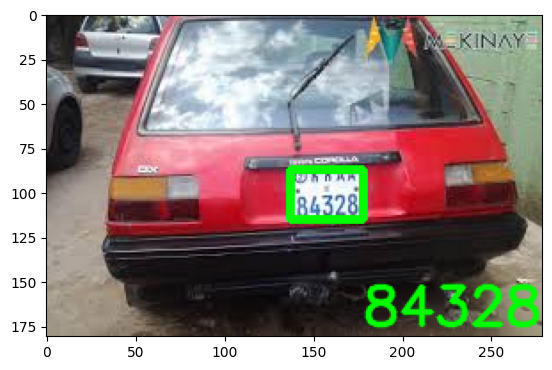

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))